In [18]:
import numpy as np
from scipy.sparse.linalg import svds

class PCA:
    def __init__(self, n_components, tol=0.0, random_seed=0):
        self.n_components = n_components
        self.tol = tol
        self.random_state_ = np.random.RandomState(random_seed)
    
    def fit(self, X):
        v0 = self.random_state_.randn(min(X.shape))
        xbar = X.mean(axis=0)
        Y = X - xbar
        S = np.dot(Y.T, Y)
        U, Sigma, VT = svds(S, k=self.n_components, tol=self.tol, v0=v0)
        self.VT_ = VT[::-1, :]
    
    def transform(self, X):
        print(self.VT_)
        print('---')
        print(X.T)
        print('-----')
        print(self.VT_.dot(X.T).T)
        return self.VT_.dot(X.T).T
        

[[ 6.13247431e-03 -3.84465551e-04 -1.70902595e-04 -8.64894648e-03
  -6.37307290e-05 -2.18857434e-01 -9.75678369e-01 -3.72498542e-06
   2.68008619e-04 -2.23381730e-04  6.35846721e-03]
 [-2.38994985e-02 -2.00966661e-03 -3.03480788e-03  1.11348551e-02
  -2.36654751e-04  9.75265982e-01 -2.18916841e-01 -2.49998510e-05
   3.27182194e-03  6.18926046e-04  1.45642451e-02]]
---
[[ 7.4    7.8    7.8   ...  6.3    5.9    6.   ]
 [ 0.7    0.88   0.76  ...  0.51   0.645  0.31 ]
 [ 0.     0.     0.04  ...  0.13   0.12   0.47 ]
 ...
 [ 3.51   3.2    3.26  ...  3.42   3.57   3.39 ]
 [ 0.56   0.68   0.65  ...  0.75   0.71   0.66 ]
 [ 9.4    9.8    9.8   ... 11.    10.2   11.   ]]
-----
[[-35.49124148   3.27633804]
 [-70.75387009   9.7085594 ]
 [-55.87881981   2.79877699]
 ...
 [-45.28479297  19.57148134]
 [-49.84902482  21.61640517]
 [-44.84176989   8.42658539]]


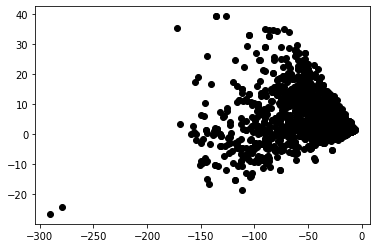

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
    
Xy = np.array(Xy[1:], dtype=np.float64)
X = Xy[:, :-1]

model = PCA(n_components=2)
model.fit(X)

Y = model.transform(X)

plt.scatter(Y[:, 0], Y[:,1], color='k')
plt.show()